## Preprocessing

In [118]:
!pip install keras-tuner
!pip install tensorflow

#### IMPORT DEPENDENCIES & LOAD DATA

In [119]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Neural Network Dependencies
import tensorflow as tf, keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.layers import LeakyReLU, Dropout, BatchNormalization


In [120]:
#  Import and read the charity_data.csv.
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [121]:
# Check Dataset for Nulls & Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [122]:
# Get Columns
columns = df.columns
columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [123]:
# Drop the non-beneficial ID columns, 'EIN', 'STATUS', 'SPECIAL CONSIDERATIONS.
dropped_cols = ['EIN', 'STATUS', 'SPECIAL_CONSIDERATIONS']
df.drop(columns=dropped_cols, inplace=True)
df.head(15)

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1
5,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,0,5000,1
6,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,100000-499999,31452,1
7,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,10M-50M,7508025,1
8,ARAMCO BRATS INC,T7,Independent,C1000,ProductDev,Trust,1-9999,94389,1
9,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0


In [124]:
# Define the target variable
target = 'IS_SUCCESSFUL'

# Define features - not using EIN or NAME
feature_columns =['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'INCOME_AMT',
       'ASK_AMT']

In [125]:
# Get Unique Values & Counts for Each Column
# chat gbt

for column in df.columns[5:]:
    print(f"'{column}' UNIQUE VALUES & COUNTS:")
    print(df[column].value_counts())
    print("\n")

'ORGANIZATION' UNIQUE VALUES & COUNTS:
ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: count, dtype: int64


'INCOME_AMT' UNIQUE VALUES & COUNTS:
INCOME_AMT
0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: count, dtype: int64


'ASK_AMT' UNIQUE VALUES & COUNTS:
ASK_AMT
5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: count, Length: 8747, dtype: int64


'IS_SUCCESSFUL' UNIQUE VALUES & COUNTS:
IS_SUCCESSFUL
1    18261
0    16038
Name: count, dtype: int64




In [126]:
# Copy DataFrame
df1 = df.copy()

In [127]:
# NUMBER OF APPLICATION TYPES
app_counts = df1.APPLICATION_TYPE.value_counts()

print(app_counts)
print(app_counts.sum())

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64
34299


In [128]:
# APPLICATION TYPES UNDER 800
app_others = app_counts.loc[app_counts < 800]

print(app_others)
app_others.sum()

APPLICATION_TYPE
T8     737
T7     725
T10    528
T9     156
T13     66
T12     27
T2      16
T25      3
T14      3
T29      2
T15      2
T17      1
Name: count, dtype: int64


2266

In [129]:
# APPLICATION TYPES VALUE COUNTS UNDER 800 
# REPLACEWITH 'OTHER'
app_min_count = 800
app_others = app_counts.loc[app_counts < app_min_count].index.tolist()

# REPLACE IN DATAFRAME
for app in app_others:
    df1.APPLICATION_TYPE = df1.APPLICATION_TYPE.replace(app,"OTHER")

# VERIFY REPLACEMENT
df1.APPLICATION_TYPE.value_counts()

APPLICATION_TYPE
T3       27037
OTHER     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: count, dtype: int64

In [130]:
# CLASSIFICATIONS VALUE COUNTS FOR GROUPING
class_counts = df1.CLASSIFICATION.value_counts()

print(class_counts.sum())
class_counts

34299


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [131]:
# CLASSIFICATIONS VALUE COUNTS UNDER 800 
# REPLACEWITH 'OTHER'
min_class = 800
class_others = class_counts.loc[class_counts < min_class].index.tolist()

# Replace in dataframe
for cls in class_others:
    df1.CLASSIFICATION = df1.CLASSIFICATION.replace(cls,"OTHER")

# Check to make sure replacement was successful
print(df1.CLASSIFICATION.value_counts().sum())
df1.CLASSIFICATION.value_counts()

34299


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
OTHER     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [132]:
df1.head(20)

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,OTHER,Independent,C1000,ProductDev,Association,0,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1
5,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,0,5000,1
6,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,100000-499999,31452,1
7,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,10M-50M,7508025,1
8,ARAMCO BRATS INC,OTHER,Independent,C1000,ProductDev,Trust,1-9999,94389,1
9,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0


In [133]:
# Create a new column 'FOR_PROFIT' to classify as 'For-Profit' or 'Non-Profit'
df1['FOR_PROFIT'] = df1.INCOME_AMT.apply(lambda x: 'NO' if x == '0' else 'YES')

# DISPLAY DATAFRAME
df1.FOR_PROFIT.value_counts()

FOR_PROFIT
NO     24388
YES     9911
Name: count, dtype: int64

In [134]:
# COPY DATAFRAME
df2 = df1.copy()

In [135]:
# INCOME_AMT VALUE COUNTS
income_count = df2.INCOME_AMT.value_counts()

# CONVERT TO LIST
print(df2.INCOME_AMT.value_counts().index.tolist())

income_count

['0', '25000-99999', '100000-499999', '1M-5M', '1-9999', '10000-24999', '10M-50M', '5M-10M', '50M+']


INCOME_AMT
0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: count, dtype: int64

In [136]:
# BIN INCOME_AMT 

# GET COLUMN
income = df2.INCOME_AMT

# CONTAINS 'M'
high = income.str.contains('M')

# COUNTS
high_count = income[high].value_counts()

# CONVERT TO LIST
high_bin = high_count.index.tolist()

# REPLACE IN DATAFRAME
for M in high_bin:
    df2.INCOME_AMT = df2.INCOME_AMT.replace(M,"HIGH")

# VERIFY REPLACEMENT WAS SUCCESSFUL
print(df2.INCOME_AMT.value_counts())

INCOME_AMT
0                24388
25000-99999       3747
100000-499999     3374
HIGH              1519
1-9999             728
10000-24999        543
Name: count, dtype: int64


In [137]:
# BIN 'MIDDLE' INCOME_AMT 
income = df2.INCOME_AMT

# CONTAINS'25000-99999, 100000-499999'
middle = income.str.contains('999') 

# COUNTS
mid_count = income[middle].value_counts()

# CONVERT TO LIST
mid_bin = mid_count.index.tolist()

# REPLACE IN DATAFRAME
for MID in mid_bin:
    df2.INCOME_AMT = df2.INCOME_AMT.replace(MID,"MIDLOW")

# VERIFY REPLACEMENT WAS SUCCESSFUL
print(df2.INCOME_AMT.value_counts())

INCOME_AMT
0         24388
MIDLOW     8392
HIGH       1519
Name: count, dtype: int64


In [138]:
# BIN 'NO' INCOME_AMT 
income = df2.INCOME_AMT

# CONTAINS 'M'
none = income.str.contains('0')

# COUNTS
no_count = income[none].value_counts()

# CONVERT TO LIST
no_bin = no_count.index.tolist()

# REPLACE IN DATAFRAME
for Z in no_bin:
    df2.INCOME_AMT = df2.INCOME_AMT.replace(Z,"NONE")

# VERIFY REPLACEMENT WAS SUCCESSFUL
print(df2.INCOME_AMT.value_counts())


INCOME_AMT
NONE      24388
MIDLOW     8392
HIGH       1519
Name: count, dtype: int64


In [139]:
df2.ASK_AMT.value_counts().sort_values()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
 9   FOR_PROFIT        34299 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.6+ MB


In [140]:
df3 = df2.copy()

In [141]:
# Group ASK_AMT into "UP TO 5000" and "OVER 5000"
df3 = df3.rename(columns={"ASK_AMT": "OVER_5000"})

# Group ASK_AMT into "YES" (over 5000) and "NO" (up to 5000)
df3.OVER_5000 = df3.OVER_5000.apply(lambda x: 'YES' if x == 5000 else 'NO')

# Check the counts of each category
print(df3.OVER_5000.value_counts())
df3.OVER_5000.value_counts().sum()

OVER_5000
YES    25398
NO      8901
Name: count, dtype: int64


34299

In [142]:
# SHAPE OF NAME COLUMN
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   OVER_5000         34299 non-null  object
 8   IS_SUCCESSFUL     34299 non-null  int64 
 9   FOR_PROFIT        34299 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


In [143]:
# BUCKET NAME COLUMN
# CREATE DISTINCT GROUP BASED ON KEY & MOST COMMON WORDS

# Step 1: Retrieve the NAME COLUMN
df3.NAME

# Step 2: Tokenize the text (split into words)
df3['TOKENS']= df3.NAME.apply(lambda x: x.split())

# Step 3: Remove stopwords (common words like 'the', 'is', 'and' that don’t add value)
stop_words = set(stopwords.words('english'))
df3['TOKENS']= df3.TOKENS.apply(lambda x: [word for word in x if word not in stop_words])

# Step 4: Flatten the token list to get all words in the dataset
all_words = [word for tokens in df3.TOKENS for word in tokens]

# Step 5: Count the frequency of each word
word_counts = Counter(all_words)

# Step 6: Get the most common words
most_common_words = word_counts.most_common(100)  # Top 50 most common words

# Step 7: Format and display each word with its frequency in parentheses
formatted_words = [f"{word} ({count})" for word, count in most_common_words]

# Step 8: Join the formatted words with commas and insert line breaks
line_length = 5  # Number of words per line
output = '\n'.join(', '.join(formatted_words[i:i + line_length]) for i in range(0, len(formatted_words), line_length))

# Display
print(output)

INC (12773), OF (9899), ASSOCIATION (3895), THE (3505), INTERNATIONAL (2849)
UNITED (2255), CLUB (1981), AND (1841), FOUNDATION (1807), STATES (1780)
FOR (1654), PARENT (1564), BOOSTER (1465), USA (1444), CONGRESS (1388)
AMERICAN (1300), & (1212), UNIVERSITY (1098), SOCIETY (1033), STATE (995)
NATIONAL (920), CLUBS (813), UNION (811), VETERANS (800), TOPS (768)
TEXAS (767), WASHINGTON (747), COMMUNITY (744), AMERICA (738), PHI (716)
CENTER (710), PTA (704), BOWLING (704), MINISTRIES (702), SCHOOL (686)
AUXILIARY (686), LEAGUE (664), COUNTY (626), SIGMA (592), ATHLETIC (578)
WOMEN (573), CALIFORNIA (568), DEPARTMENT (546), EDUCATION (528), AMATEUR (503)
ALPHA (503), COUNCIL (495), WARS (477), IN (476), FOREIGN (451)
ORGANIZATION (451), FREE (450), MASONS (435), FEDERATION (427), YOUTH (426)
CHAPTER (424), ACCEPTED (423), TO (404), ORDER (400), EDUCATIONAL (384)
LITTLE (377), AMERICAS (361), VFW (352), BASEBALL (349), A (346)
AIR (342), SOROPTIMIST (340), LIONS (336), S (332), FUND (331)

In [144]:
# CREATE GROUPS FROM NAME
# GAVE CHAT GBT NAMS & MOST COMMON WORDS TO ANALYZE FOR GROUPING

# Define regex patterns for each group
keywords = {
    'CLUB/ORGANIZATION': r'\b(CLUB|SOCIETY|ORGANIZATION|FRATERNITY|CHAPTER)\b',
    'ASSOCIATION/ALLIANCE': r'\b(ASSOCIATION|ALLIANCE|FEDERATION|ASSOC)\b',
    'FOUNDATION/TRUST': r'\b(FOUNDATION|TRUST)\b',
    'EDUCATIONAL INSTITUTE': r'\b(INSTITUTE|ACADEMY|SCHOOL|UNIVERSITY|COLLEGE|PTA|PTO)\b',
    'CORPORATE ENTITY': r'\b(CORPORATION|INC|LLC)\b',
    'RELIGIOUS/MINISTRIES': r'\b(MINISTRIES|CHURCH|FAITH|GOSPEL|HOPE|BIBLICAL)\b',
    'GOVERNMENT/COUNCIL': r'\b(GOVERNMENT|BOARD|COUNCIL|CONGRESS)\b',
    'LABOR UNION/TRADE': r'\b(IBEW|FIREFIGHTERS|IRONWORKERS|APPRENTICESHIP|WORKERS|UNION)\b',
    'MASONIC/FRATERNAL ORDER': r'\b(ORDER OF THE EASTERN STAR|MASONS|KNIGHTS|OES|MASONIC|DEMOLAY|EAGLES|SONS OF ITALY)\b',
    'VETERAN/MILITARY': r'\b(VETERAN|VETERANS|MILITARY|AUXILIARY|LEGION|GUARD|VFW)\b',
    'CIVIC': r'\b(ROTARY|CIVITAN|COMMUNITY|SERRA|SORORITY|CHARITY|VOLUNTEERS|CHARITABLE|LIONS)\b',
    'TRIBAL': r'\b(TRIBE|NATIVE AMERICAN|TRIBAL)\b'
}

# Function to classify names using regex
def classify_name(name):
    name_upper = name.upper()  # Convert the name to uppercase
    for group, pattern in keywords.items():
        if re.search(pattern, name_upper):  # Use regex search to match the pattern
            return group
    return 'OTHER'

# Apply the classification to the list of organization names
df3['NAME_CATEGORY'] = df3.NAME.apply(classify_name)

# Display grouped data
print(df3[['NAME', 'NAME_CATEGORY']])
df3.NAME_CATEGORY.value_counts()

                                                    NAME  \
0                           BLUE KNIGHTS MOTORCYCLE CLUB   
1                 AMERICAN CHESAPEAKE CLUB CHARITABLE TR   
2                     ST CLOUD PROFESSIONAL FIREFIGHTERS   
3                         SOUTHSIDE ATHLETIC ASSOCIATION   
4               GENETIC RESEARCH INSTITUTE OF THE DESERT   
...                                                  ...   
34294              THE LIONS CLUB OF HONOLULU KAMEHAMEHA   
34295           INTERNATIONAL ASSOCIATION OF LIONS CLUBS   
34296                                PTA HAWAII CONGRESS   
34297  AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...   
34298                           WATERHOUSE CHARITABLE TR   

               NAME_CATEGORY  
0          CLUB/ORGANIZATION  
1          CLUB/ORGANIZATION  
2          LABOR UNION/TRADE  
3       ASSOCIATION/ALLIANCE  
4      EDUCATIONAL INSTITUTE  
...                      ...  
34294      CLUB/ORGANIZATION  
34295   ASSOCIATION/ALLIANCE  


NAME_CATEGORY
CORPORATE ENTITY           9725
OTHER                      7754
ASSOCIATION/ALLIANCE       4577
CLUB/ORGANIZATION          3958
EDUCATIONAL INSTITUTE      2413
FOUNDATION/TRUST           1888
MASONIC/FRATERNAL ORDER     969
VETERAN/MILITARY            916
CIVIC                       662
LABOR UNION/TRADE           559
RELIGIOUS/MINISTRIES        542
GOVERNMENT/COUNCIL          326
TRIBAL                       10
Name: count, dtype: int64

In [145]:
df4 = df3.copy()

In [146]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   OVER_5000         34299 non-null  object
 8   IS_SUCCESSFUL     34299 non-null  int64 
 9   FOR_PROFIT        34299 non-null  object
 10  TOKENS            34299 non-null  object
 11  NAME_CATEGORY     34299 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.1+ MB


In [147]:
# DROP NAME & TOKEN COLUMNS
cols = ['NAME', 'TOKENS']
df4.drop(columns=cols, inplace=True)
df4.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'OVER_5000', 'IS_SUCCESSFUL',
       'FOR_PROFIT', 'NAME_CATEGORY'],
      dtype='object')

In [148]:
# Separate numeric and categorical data 
num_data = df4.select_dtypes(include=['int64'])
cat_data = df4.select_dtypes(include=['object'])

print(cat_data.columns)
print(num_data.columns)

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'OVER_5000', 'FOR_PROFIT',
       'NAME_CATEGORY'],
      dtype='object')
Index(['IS_SUCCESSFUL'], dtype='object')


In [149]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(cat_data)

# Combine dummies with DataFrame
combined_df = pd.concat([num_data, dummies], axis=1)

# Display the combined DataFrame
combined_df.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_OTHER,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_OTHER,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_HIGH,INCOME_AMT_MIDLOW,INCOME_AMT_NONE,OVER_5000_NO,OVER_5000_YES,FOR_PROFIT_NO,FOR_PROFIT_YES,NAME_CATEGORY_ASSOCIATION/ALLIANCE,NAME_CATEGORY_CIVIC,NAME_CATEGORY_CLUB/ORGANIZATION,NAME_CATEGORY_CORPORATE ENTITY,NAME_CATEGORY_EDUCATIONAL INSTITUTE,NAME_CATEGORY_FOUNDATION/TRUST,NAME_CATEGORY_GOVERNMENT/COUNCIL,NAME_CATEGORY_LABOR UNION/TRADE,NAME_CATEGORY_MASONIC/FRATERNAL ORDER,NAME_CATEGORY_OTHER,NAME_CATEGORY_RELIGIOUS/MINISTRIES,NAME_CATEGORY_TRIBAL,NAME_CATEGORY_VETERAN/MILITARY
0,1,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,1,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
2,0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,1,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
4,1,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False


In [150]:
# Check datatypes
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   IS_SUCCESSFUL                          34299 non-null  int64
 1   APPLICATION_TYPE_OTHER                 34299 non-null  bool 
 2   APPLICATION_TYPE_T19                   34299 non-null  bool 
 3   APPLICATION_TYPE_T3                    34299 non-null  bool 
 4   APPLICATION_TYPE_T4                    34299 non-null  bool 
 5   APPLICATION_TYPE_T5                    34299 non-null  bool 
 6   APPLICATION_TYPE_T6                    34299 non-null  bool 
 7   AFFILIATION_CompanySponsored           34299 non-null  bool 
 8   AFFILIATION_Family/Parent              34299 non-null  bool 
 9   AFFILIATION_Independent                34299 non-null  bool 
 10  AFFILIATION_National                   34299 non-null  bool 
 11  AFFILIATION_Other           

In [151]:
# TARGET AND FEATURES
label = 'IS_SUCCESSFUL'

# DROP TARGET COLUMN 
col_data = combined_df.drop(columns=label)

#FEATURES ARRAY
features = col_data.loc[:].values 

# Extract target as an array
target = combined_df[label].values

print(features.shape, target.shape)
print(target)
print(features)

(34299, 47) (34299,)
[1 1 0 ... 0 1 0]
[[ True False False ... False False False]
 [False False  True ... False False False]
 [False False False ... False False False]
 ...
 [False False  True ... False False False]
 [False False False ... False False False]
 [False False  True ... False False False]]


In [152]:
# Split our preprocessed data into our features and target arrays
y = target
X = features

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(25724, 47) (8575, 47)


In [153]:
  # Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [154]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])
layer_1 = 100
layer_2 = 75
layer_3 = 25

nn_model_A = tf.keras.models.Sequential()

# First hidden layer
nn_model_A.add(tf.keras.layers.Dense(units=layer_1, activation="relu", input_dim=num_features))

# Second hidden layer
nn_model_A.add(tf.keras.layers.Dense(units=layer_2, activation="sigmoid"))

# Third hidden layer
nn_model_A.add(tf.keras.layers.Dense(units=layer_3, activation="relu"))

# Output layer
nn_model_A.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_A.summary()

/Users/redhawkwax/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 100)            │         4,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 25)             │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,301 (55.86 KB)

 Trainable params: 14,301 (55.86 KB)

 Non-trainable params: 0 (0.00 B)

In [155]:
#FUNCTION TO SAVE EVERY 5 EPOCHS
# CHAT GBT
import keras

# Custom callback to save every 5 epochs
class SaveEveryNEpochs(keras.callbacks.Callback):
    def __init__(self, save_freq, save_path):
        super(SaveEveryNEpochs, self).__init__()
        self.save_freq = save_freq
        self.save_path = save_path
    
    def on_epoch_end(self, epoch, logs=None):
        # Save the model weights every 5 epochs
        if (epoch + 1) % self.save_freq == 0:
            self.model.save_weights(self.save_path)
            print(f"\nSaving model weights at epoch {epoch + 1}")

In [156]:
# Compile the Sequential model together and customize metrics
nn_model_A.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the file path to save the model's weights
filepath = '/tmp/ckpt/checkpoint.weights.h5'

# Fit the model to the training data
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Instantiate the custom callback to save every 5 epochs
save_callback = SaveEveryNEpochs(save_freq=5, save_path=filepath)

# Train the model and use the custom callback
fit_model = nn_model_A.fit(X_train_scaled, y_train, epochs=80, callbacks=[early_stop,save_callback])

# Load the model's weights after training if needed
nn_model_A.load_weights(filepath)

Epoch 1/80


804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.7087 - loss: 0.5726
Epoch 2/80
278/804 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.7532 - loss: 0.5193

/Users/redhawkwax/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.7576 - loss: 0.5144
Epoch 3/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.7633 - loss: 0.5071
Epoch 4/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.7684 - loss: 0.4971
Epoch 5/80
690/804 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.7618 - loss: 0.5065
Saving model weights at epoch 5
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.7623 - loss: 0.5057
Epoch 6/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.7596 - loss: 0.5034
Epoch 7/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.7765 - loss: 0.4885
Epoch 8/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.7694 - loss: 0.4920
Epoch 9/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.7698 - loss: 0.4924
Epoch 10/80
694/804 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.7709 - loss: 0.4911
Saving model weights at epoch 10
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.7707 - loss: 0.4915

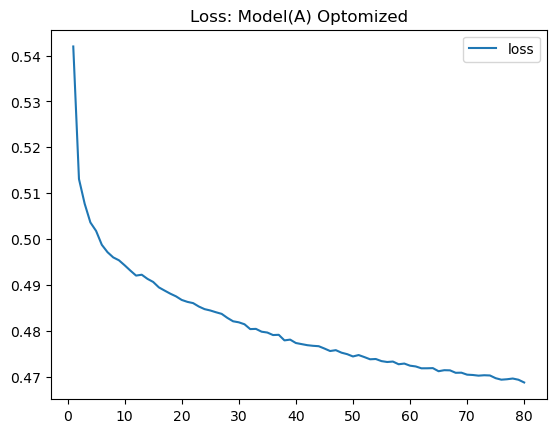

<Figure size 640x480 with 0 Axes>

In [157]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss", title="Loss: Model(A) Optomized")
plt.show()
plt.savefig('model_A_loss_optimized.png')

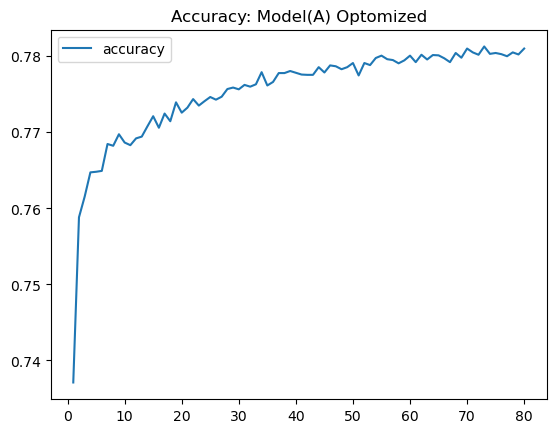

<Figure size 640x480 with 0 Axes>

In [158]:
# Plot the accuracy
history_df.plot(y="accuracy", title="Accuracy: Model(A) Optomized")
plt.show()
plt.savefig('model_A_accuracy_optimized.png')

In [159]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_A.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 673us/step - accuracy: 0.7616 - loss: 0.5279
Loss: 0.5278545618057251, Accuracy: 0.7616326808929443


In [160]:
# Export our model to HDF5 file
nn_model_A.save("AlphabetSoupCharity_Optimization_V1.h5")

In [161]:

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])
layer_1 = 100
layer_2 = 50
layer_3 = 25

nn_model_B = tf.keras.models.Sequential()

# First hidden layer
nn_model_B.add(tf.keras.layers.Dense(units=layer_1, activation="sigmoid", input_dim=num_features))
nn_model_B.add(BatchNormalization()) 

# Second hidden layer
nn_model_B.add(tf.keras.layers.Dense(units=layer_2, activation="sigmoid"))
nn_model_B.add(BatchNormalization()) 

# Third hidden layer
nn_model_B.add(tf.keras.layers.Dense(units=layer_3, activation="relu"))
nn_model_B.add(BatchNormalization()) 

# Output layer
nn_model_B.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_B.summary()

/Users/redhawkwax/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 100)            │         4,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,851 (46.29 KB)

 Trainable params: 11,501 (44.93 KB)

 Non-trainable params: 350 (1.37 KB)

In [162]:
# Compile the model, chat gbt helped with code
optimizer = Adam(learning_rate=0.001)
nn_model_B.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Define the file path to save the model's weights
filepath = '/tmp/ckpt/checkpoint.weights.h5'

# Fit the model to the training data
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Instantiate the custom callback to save every 5 epochs
save_callback = SaveEveryNEpochs(save_freq=5, save_path=filepath)

# Train the model and use the custom callback
fit_model = nn_model_B.fit(X_train_scaled, y_train, epochs=80, callbacks=[early_stop,save_callback])
# fit_model = nn_model_B.fit(X_train_scaled, y_train, validation_split=0.2, epochs=80, callbacks=[early_stop, checkpoint])

# Load the model's weights after training if needed
nn_model_B.load_weights(filepath)

Epoch 1/80


804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.7180 - loss: 0.5713
Epoch 2/80
332/804 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.7601 - loss: 0.5115

/Users/redhawkwax/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.7553 - loss: 0.5186
Epoch 3/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.7539 - loss: 0.5189
Epoch 4/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.7619 - loss: 0.5114
Epoch 5/80
793/804 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.7624 - loss: 0.5046
Saving model weights at epoch 5
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.7624 - loss: 0.5047
Epoch 6/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.7616 - loss: 0.5114
Epoch 7/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.7616 - loss: 0.5111
Epoch 8/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.7664 - loss: 0.5023
Epoch 9/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.7681 - loss: 0.4984
Epoch 10/80
797/804 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.7650 - loss: 0.5019
Saving model weights at epoch 10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.7650 - loss: 0.5019

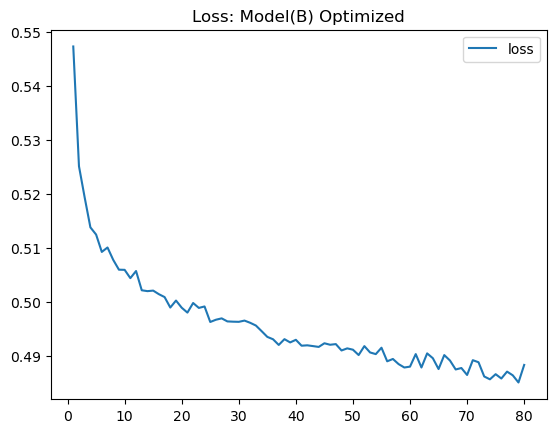

<Figure size 640x480 with 0 Axes>

In [163]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss", title="Loss: Model(B) Optimized")
plt.show()
plt.savefig('model_B_loss_optimized.png')



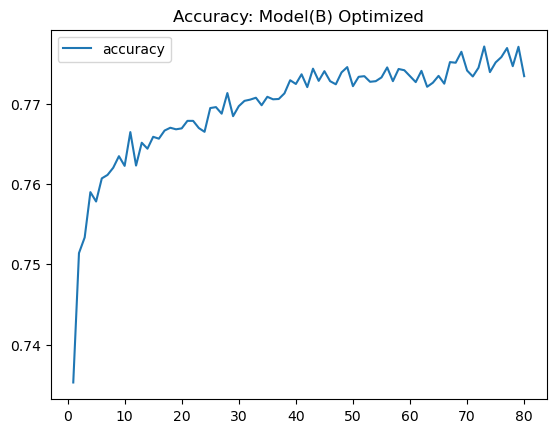

<Figure size 640x480 with 0 Axes>

In [164]:
# Plot the accuracy
history_df.plot(y="accuracy", title="Accuracy: Model(B) Optimized")
plt.show()
plt.savefig('model_B_accuracy_optimized.png')

In [165]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_B.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 851us/step - accuracy: 0.7609 - loss: 0.5128
Loss: 0.5128142833709717, Accuracy: 0.7609329223632812


In [166]:
# Export our model to HDF5 file
nn_model_B.save("AlphabetSoupCharity_Optimization_V2.h5")